In [ ]:
# Percentage of People who know Python Country Wise

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 100)

In [3]:
df.head(25)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [4]:
country_count = df['Country'].value_counts()
country_count

Country
United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Papua New Guinea                        1
Saint Kitts and Nevis                   1
Saint Vincent and the Grenadines        1
Sao Tome and Principe                   1
Chad                                    1
Name: count, Length: 179, dtype: int64

In [5]:
country_uses_python = df.groupby('Country')['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
country_uses_python

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [9]:
combined_data = pd.concat([country_count, country_uses_python], axis='columns')
combined_data

,count,LanguageWorkedWith
Country,,
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
...,...,...
Papua New Guinea,1,0
Saint Kitts and Nevis,1,0
Saint Vincent and the Grenadines,1,0


In [22]:
combined_data.rename(columns={'count': 'NumRespondents', 'LanguageWorkedWith': 'NumKnowsPython'}, inplace=True)
final_data = combined_data[combined_data['NumRespondents'] > 10]
final_data

,NumRespondents,NumKnowsPython
Country,,
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
...,...,...
Somalia,13,3
Qatar,13,5
Rwanda,12,5


In [35]:
final_data.loc[:, 'PctKnowsPython'] = (final_data['NumKnowsPython'] / final_data['NumRespondents']) * 100

In [36]:
final_data.loc[:, 'PctKnowsPython'] = final_data['PctKnowsPython'].round(2)

In [37]:
final_data

,NumRespondents,NumKnowsPython,PctKnowsPython
Country,,,
Uganda,72,47,65.28
Iceland,49,30,61.22
Oman,11,6,54.55
Cuba,30,16,53.33
Republic of Korea,39,20,51.28
...,...,...,...
Afghanistan,44,8,18.18
Myanmar,52,9,17.31
Republic of Moldova,43,7,16.28


In [39]:
final_data = final_data.sort_values('PctKnowsPython', ascending=False)
final_data.head(25)

,NumRespondents,NumKnowsPython,PctKnowsPython
Country,,,
Uganda,72,47,65.28
Iceland,49,30,61.22
Oman,11,6,54.55
Cuba,30,16,53.33
Republic of Korea,39,20,51.28
South Korea,160,80,50.00
Chile,206,102,49.51
Finland,546,266,48.72
Kenya,249,120,48.19


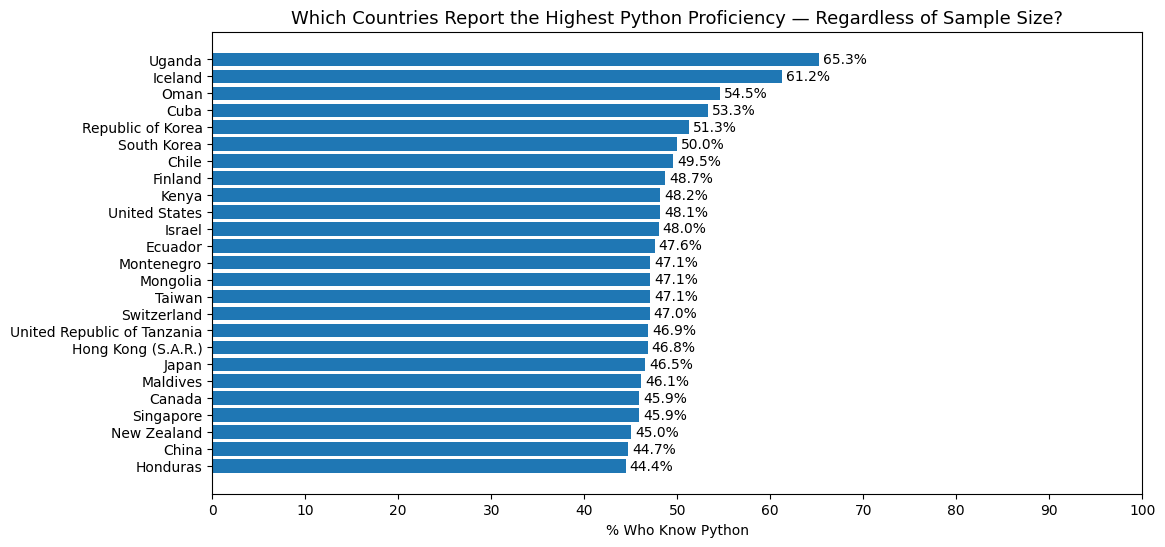

In [93]:
top_25 = final_data.head(25)

x = top_25.index

y = top_25['PctKnowsPython']

plt.figure(figsize=(12, 6))

bar_container = plt.barh(x, y)

plt.xlabel('% Who Know Python')

plt.title('Which Countries Report the Highest Python Proficiency — Regardless of Sample Size?', fontsize=13)

plt.gca().invert_yaxis()

plt.bar_label(bar_container, padding=3, fmt='{:.1f}%')

plt.xticks(range(0,110, 10))

plt.savefig('PctKnowsPython.png')

plt.show()